# Análise exploratória

#### Merge dos datasets tratados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
from pathlib import Path

# Configuração profissional de caminhos
PROJECT_ROOT = Path.cwd().parent.parent  # Ajuste baseado na localização real do notebook
DATA_DIR = PROJECT_ROOT / "case_a3data" / "app" / "data"

def load_processed_data():
    """Carrega dados processados com verificação robusta"""
    try:
        df_books = pd.read_csv(DATA_DIR / "books_data_tratado.csv")
        df_ratings = pd.read_csv(DATA_DIR / "books_rating_tratado.csv")
        print("✅ Dados carregados com sucesso!")
        return df_books, df_ratings
        
    except FileNotFoundError as e:
        print(f"❌ Erro: {str(e)}")
        print("Verifique se os arquivos existem em:")
        print(f"1. {DATA_DIR / 'books_data_tratado.csv'}")
        print(f"2. {DATA_DIR / 'books_rating_tratado.csv'}")
        raise

# Processamento principal
try:
    # Carrega dados
    df_books, df_ratings = load_processed_data()
    
    # Padronização
    df_books["Title"] = df_books["Title"].str.lower().str.strip()
    df_ratings["Title"] = df_ratings["Title"].str.lower().str.strip()

    # Merge seguro
    df_merged = pd.merge(
        df_ratings,
        df_books,
        on="Title",
        how="inner",
    )
    
    # Remoção de duplicatas com critério claro
    initial_count = len(df_merged)
    df_merged = df_merged.drop_duplicates(
        subset=['Id', 'User_id'],
        keep='first'
    )
    print(f"⚠️ Removidas {initial_count - len(df_merged)} duplicatas")

    # Salvamento seguro
    output_path = DATA_DIR / "books_final_merged_tratado.csv"
    output_path.parent.mkdir(parents=True, exist_ok=True)  # Garante que o diretório existe
    df_merged.to_csv(output_path, index=False)
    print(f"💾 Arquivo salvo em: {output_path.resolve()}")

    display(df_merged.head(3))

except Exception as e:
    print(f"🔥 Erro crítico: {str(e)}")
    # Adicione aqui qualquer lógica adicional de tratamento de erro

✅ Dados carregados com sucesso!
⚠️ Removidas 242432 duplicatas
💾 Arquivo salvo em: C:\Users\Thiago_W\Desktop\A3_Case\case_a3data\app\data\books_final_merged_tratado.csv


,Id,Title,Price,User_id,profileName,score,time,summary,text,text_concat,description,authors,publisher,publishedDate,categories,ratingsCount
0,0786280670,"julie and julia: 365 days, 524 recipes, 1 tiny...",NaN,AWF1MPR7NZX07,Mary,2.0,1969-12-31 23:59:59,Disappointing...read My Life in France by Juli...,I eagerly snatched this book up when I saw it ...,Disappointing...read My Life in France by Juli...,"Pushing thirty, living in a rundown apartment ...",['Julie Powell'],Viking,2005,"['Cookery, French']",5
1,0786280670,"julie and julia: 365 days, 524 recipes, 1 tiny...",NaN,A3LL5TMGX00LA1,Virginia Teacher Mom,2.0,1969-12-31 23:59:59,"For once, the movie was better.","I purchased this book after seeing, and truly ...","For once, the movie was better. I purchased th...","Pushing thirty, living in a rundown apartment ...",['Julie Powell'],Viking,2005,"['Cookery, French']",5
2,0786280670,"julie and julia: 365 days, 524 recipes, 1 tiny...",NaN,A2ZE8PHSFIQBLQ,"Sarah Beagle ""Sarah Beagle""",1.0,1969-12-31 23:59:59,Dazed and Confused,I had such high hopes for this book and I was ...,Dazed and Confused I had such high hopes for t...,"Pushing thirty, living in a rundown apartment ...",['Julie Powell'],Viking,2005,"['Cookery, French']",5


In [3]:
df_merged.info()

NameError: name 'df_merged' is not defined

## Analisando os dados do dataset mergeado

#### Distribuição de notas (score)

##### Resumo

In [9]:
# Estatística descritiva
print("Estatísticas da coluna 'score':")
stats = df_merged['score'].describe()
for stat, value in stats.items():
    print(f"{stat:>7}: {value:,.2f}")


# Porcentagem para cada pontuação
print("\nDistribuição percentual:")
percent = df_merged['score'].value_counts(normalize=True).sort_index() * 100
for score, pct in percent.items():
    print(f"Pontuação {int(score)}: {pct:.2f}%")



Estatísticas da coluna 'score':
  count: 2,397,301.00
   mean: 4.22
    std: 1.18
    min: 1.00
    25%: 4.00
    50%: 5.00
    75%: 5.00
    max: 5.00

Distribuição percentual:
Pontuação 1: 6.23%
Pontuação 2: 4.94%
Pontuação 3: 8.77%
Pontuação 4: 20.21%
Pontuação 5: 59.85%


#### Distribuição das Pontuações

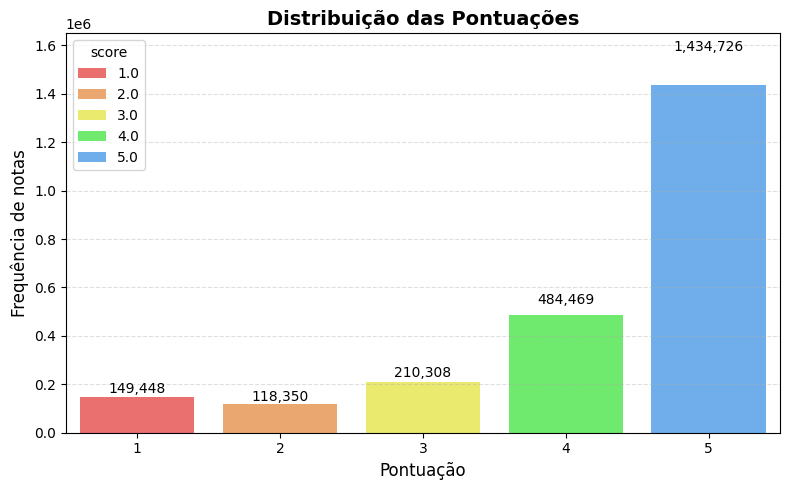

In [11]:
# Gráfico de barras para cada pontuação
plt.figure(figsize=(8,5))
score_counts = df_merged['score'].value_counts().sort_index()

cores = ['#FF5A5A', '#FFA55A', '#FFFF5A', '#5AFF5A', '#5AAFFF']
ax = sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=cores, legend=True)

for i, v in enumerate(score_counts.values):
    ax.text(i, v + 0.1*v, f'{v:,}', ha='center')

plt.title('Distribuição das Pontuações', fontsize=14, fontweight='bold')
plt.xlabel('Pontuação', fontsize=12)
plt.ylabel('Frequência de notas', fontsize=12)
plt.xticks([0, 1, 2, 3, 4], ['1', '2', '3', '4', '5'])
plt.grid(True, axis='y', linestyle='--', alpha=0.4)

y_max = score_counts.max() * 1.15  
plt.ylim(0, y_max)

plt.tight_layout() 
plt.show()

#### Top 10 Livros Mais Avaliados

Aqui, vemos quais livros mais receberam reviews

In [5]:
top_books_count = (
    df_merged.groupby("Title")["Id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print(top_books_count)


Title
pride and prejudice           17392
the hobbit                    17366
atlas shrugged                10480
wuthering heights              8360
to kill a mockingbird          6450
great expectations             6123
of mice and men                6074
the picture of dorian gray     5758
mere christianity              5333
brave new world                4968
Name: Id, dtype: int64


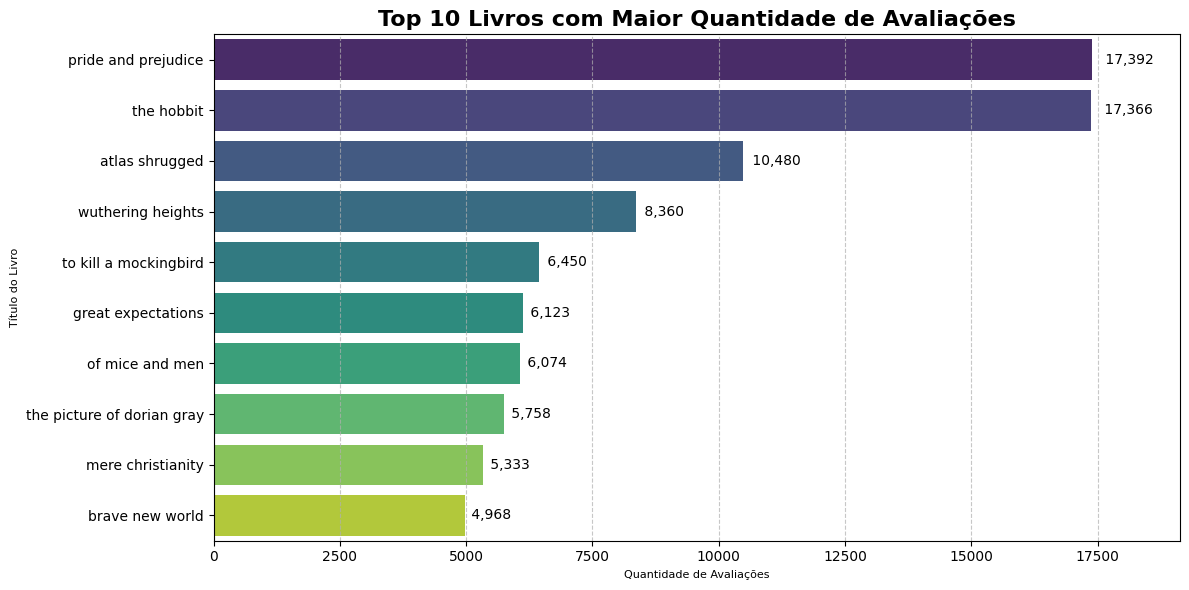

In [6]:
top_books_count = df_merged.groupby("Title")["Id"].count().sort_values(ascending=False).head(10)

titles_short = [t[:30] + '...' if len(t) > 30 else t for t in top_books_count.index]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=top_books_count.values, y=titles_short, hue=titles_short, palette='viridis', legend=False)

for i, v in enumerate(top_books_count.values):
    ax.text(v + v*0.01, i, f' {v:,}', va='center')

plt.title('Top 10 Livros com Maior Quantidade de Avaliações', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade de Avaliações', fontsize=8)
plt.ylabel('Título do Livro', fontsize=8)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

x_max = top_books_count.max() * 1.1
plt.xlim(0, x_max)

plt.tight_layout()
plt.show()

#### Top 10 Livros com Melhor Avaliação Média

AVALIAREMOS LIVROS COM UM MÍNIMO DE 1000 AVALIAÇÕES

In [8]:
minimo_avaliacoes = 1000

# Agrupa por título e calcula a média
avg_score_books = (
    df_merged.groupby("Title")["score"]
    .mean()
    .sort_values(ascending=False)
)

# Filtra apenas livros com pelo menos 1000 avaliações, para evitar casos com 1 avaliação
avg_score_books_filtered = avg_score_books[df_merged.groupby("Title")["Id"].count() > minimo_avaliacoes].head(10)

print(avg_score_books_filtered)

Title
harry potter & the prisoner of azkaban                              4.765573
redeeming love                                                      4.745244
man's search for meaning                                            4.734003
a tree grows in brooklyn                                            4.715640
god calling                                                         4.693095
a christmas carol (classic fiction)                                 4.691161
the hobbit; or, there and back again                                4.687995
harry potter and the sorcerer's stone                               4.687688
gone with the wind                                                  4.684681
the hobbitt, or there and back again; illustrated by the author.    4.679304
Name: score, dtype: float64


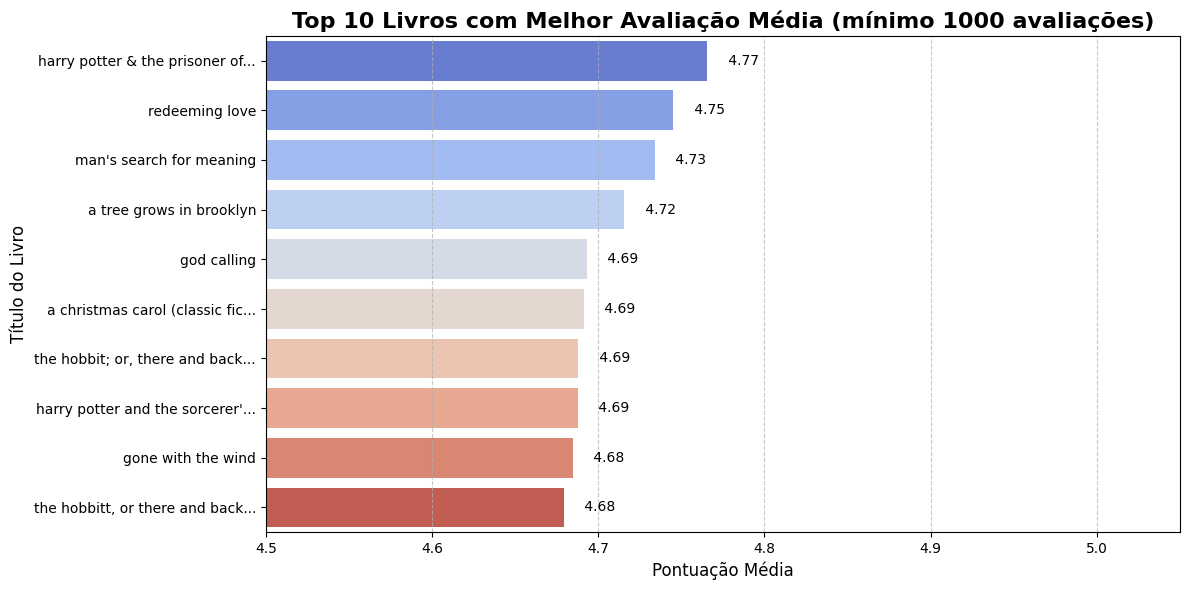

In [9]:
# Agrupa por título e calcula a média
avg_score_books = (
    df_merged.groupby("Title")["score"]
    .mean()
    .sort_values(ascending=False)
)

avg_score_books_filtered = avg_score_books[df_merged.groupby("Title")["Id"].count() > minimo_avaliacoes].head(10)
titles_short = [t[:30] + '...' if len(t) > 30 else t for t in avg_score_books_filtered.index]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=avg_score_books_filtered.values, 
                 y=titles_short, 
                 hue=titles_short, 
                 palette='coolwarm', 
                 legend=False)

for i, v in enumerate(avg_score_books_filtered.values):
    ax.text(v + 0.01, i, f' {v:.2f}', va='center')

plt.title(f'Top 10 Livros com Melhor Avaliação Média (mínimo {minimo_avaliacoes} avaliações)', fontsize=16, fontweight='bold')
plt.xlabel('Pontuação Média', fontsize=12)
plt.ylabel('Título do Livro', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.xlim(4.5, 5.05)  
plt.tight_layout()
plt.show()

#### Analisando autores

In [10]:
df_merged_exploded = df_merged.explode("authors")

##### TOP 10 Autores com mais avaliações

In [11]:
# Função extrair nome do autor da lista de autores

def limpar_lista(lista_string):
    """
    Remove colchetes e aspas caso o valor seja algo como ['Fulano'].
    """
    if isinstance(lista_string, str) and lista_string.startswith("[") and lista_string.endswith("]"):
        try:
            
            parsed = ast.literal_eval(lista_string)
            if isinstance(parsed, list):
                
                return ", ".join(parsed)
        except:
            pass
    return lista_string.strip("[]'")  


In [12]:
# Filtra os registros válidos, removendo os 'Not informed'
df_valid_authors = df_merged_exploded[df_merged_exploded["authors"] != "['Not informed']"]

# Calcula os 10 autores mais avaliados, sem considerar os 'Not informed'
top_authors_validos = (
    df_valid_authors.groupby("authors")["Id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Calcula o total de avaliações dos registros 'Not informed'
not_informed_count = df_merged_exploded[df_merged_exploded["authors"] == "['Not informed']"].shape[0]

print("Top 10 autores com mais avaliações (excluindo 'Not informed'):")
print(top_authors_validos)
print("\nTotal de avaliações de 'Not informed':", not_informed_count)



Top 10 autores com mais avaliações (excluindo 'Not informed'):
authors
['Jane Austen']                  30968
['J. R. R. Tolkien']             29254
['Charles Dickens']              17945
['John Steinbeck']               17280
['Lewis Carroll']                11177
['C. S. Lewis']                  10306
['Kurt Vonnegut']                 9794
['John Ronald Reuel Tolkien']     9447
['Emily Bronte']                  9210
['F. Scott Fitzgerald']           8450
Name: Id, dtype: int64

Total de avaliações de 'Not informed': 297121


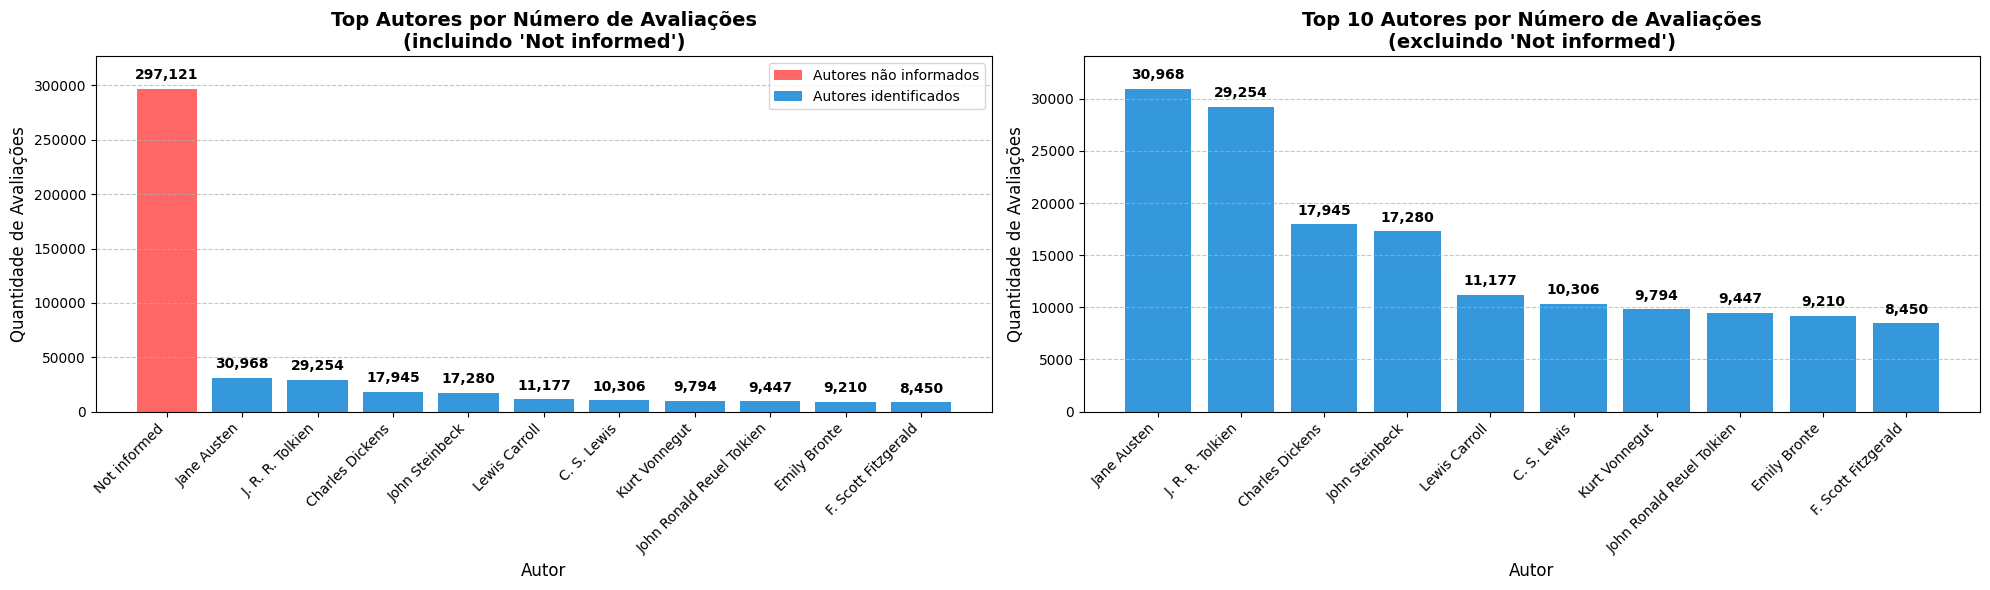

In [14]:
# Figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# GRÁFICO 1 - COM "Not informed"
top_authors = df_merged_exploded.groupby("authors")["Id"].count().sort_values(ascending=False).head(11)
clean_names = [limpar_lista(author) for author in top_authors.index]
colors = ['#FF6666' if 'Not informed' in name else '#3498db' for name in clean_names]

bars1 = ax1.bar(range(len(top_authors)), top_authors.values, color=colors)

for i, v in enumerate(top_authors.values):
    ax1.text(i, v + 0.03*max(top_authors.values), f'{v:,}', 
             ha='center', fontsize=10, fontweight='bold')

ax1.set_xticks(range(len(top_authors)))
ax1.set_xticklabels(clean_names, rotation=45, ha='right')
ax1.set_title("Top Autores por Número de Avaliações\n(incluindo 'Not informed')", fontsize=14, fontweight='bold')
ax1.set_xlabel("Autor", fontsize=12)
ax1.set_ylabel("Quantidade de Avaliações", fontsize=12)

not_informed_patch = plt.Rectangle((0,0), 1, 1, fc='#FF6666')
author_patch = plt.Rectangle((0,0), 1, 1, fc='#3498db')
ax1.legend([not_informed_patch, author_patch], ['Autores não informados', 'Autores identificados'], 
           loc='upper right')

ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0, max(top_authors.values) * 1.1)

# GRÁFICO 2 - SEM "Not informed"
df_valid_authors = df_merged_exploded[df_merged_exploded["authors"] != "['Not informed']"]
top_authors_validos = df_valid_authors.groupby("authors")["Id"].count().sort_values(ascending=False).head(10)
clean_names_validos = [limpar_lista(author) for author in top_authors_validos.index]

bars2 = ax2.bar(range(len(top_authors_validos)), top_authors_validos.values, color='#3498db')

for i, v in enumerate(top_authors_validos.values):
    ax2.text(i, v + 0.03*max(top_authors_validos.values), f'{v:,}', 
             ha='center', fontsize=10, fontweight='bold')

ax2.set_xticks(range(len(top_authors_validos)))
ax2.set_xticklabels(clean_names_validos, rotation=45, ha='right')
ax2.set_title("Top 10 Autores por Número de Avaliações\n(excluindo 'Not informed')", fontsize=14, fontweight='bold')
ax2.set_xlabel("Autor", fontsize=12)
ax2.set_ylabel("Quantidade de Avaliações", fontsize=12)

ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, max(top_authors_validos.values) * 1.1)

plt.tight_layout()
plt.show()

##### TOP Autores por Avaliação Média

In [15]:
# Filtrando os dados para remover autores que não foram informados ("Not informed")
df_valid_authors = df_merged_exploded[df_merged_exploded["authors"] != "['Not informed']"]

avg_score_authors = (
    df_valid_authors.groupby("authors")["score"]
    .mean()
    .sort_values(ascending=False)
)

# Filtrando autores com pelo menos X avaliações para evitar outliers
counts_by_author = df_valid_authors.groupby("authors")["Id"].count()
authors_with_min_reviews = counts_by_author[counts_by_author > minimo_avaliacoes].index

avg_score_authors_filtered = avg_score_authors.loc[authors_with_min_reviews].head(10).sort_values(ascending=False)

print(avg_score_authors_filtered)

authors
['A. J. Russell']             4.694656
['Alan Moore']                4.523416
['Alexandre Dumas']           4.522801
["Louis L'Amour"]             4.488452
['Alan Paton']                4.349103
['Agatha Christie']           4.309750
["Patrick O'Brian"]           4.250382
['Aldous Huxley']             4.230432
['Alexander McCall Smith']    4.203846
['Adam Smith']                4.090769
Name: score, dtype: float64


['A. J. Russell', 'Alan Moore', 'Alexandre Dumas', "Louis L'Amour", 'Alan Paton', 'Agatha Christie', "Patrick O'Brian", 'Aldous Huxley', 'Alexander McCall Smith', 'Adam Smith']


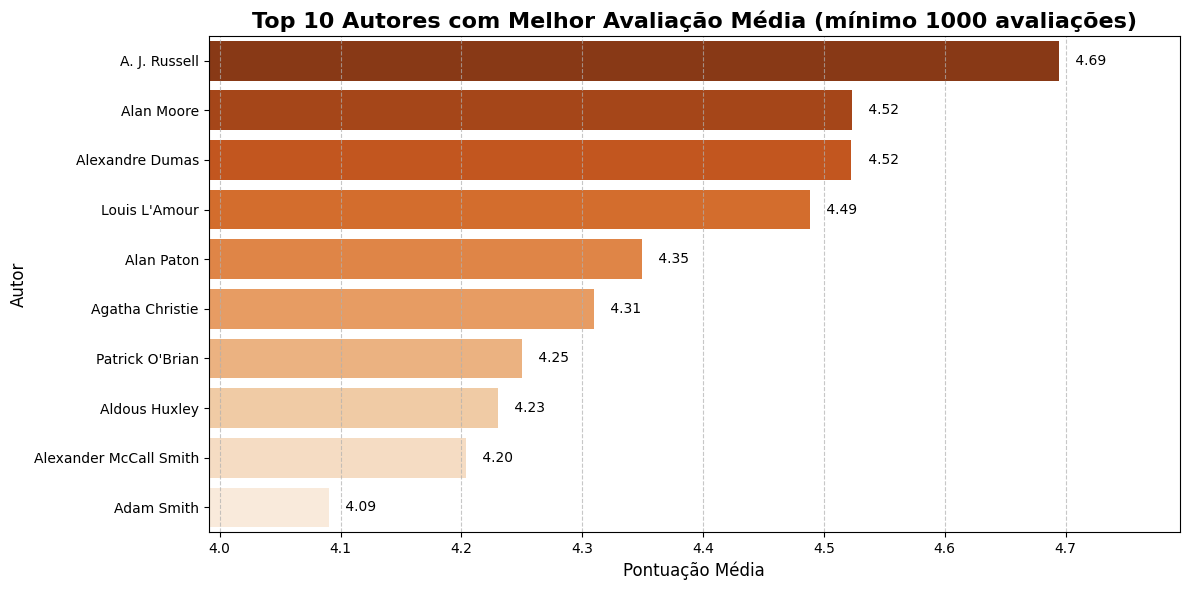

In [16]:
authors_cleaned = [limpar_lista(a) for a in avg_score_authors_filtered.index]
print(authors_cleaned)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=avg_score_authors_filtered.values,
    y=authors_cleaned,
    hue=authors_cleaned,  
    palette="Oranges_r",
    legend=False  
)

for i, v in enumerate(avg_score_authors_filtered.values):
    ax.text(v + 0.01, i, f" {v:.2f}", va="center")

plt.title(f"Top 10 Autores com Melhor Avaliação Média (mínimo {minimo_avaliacoes} avaliações)", fontsize=16, fontweight="bold")
plt.xlabel("Pontuação Média", fontsize=12)
plt.ylabel("Autor", fontsize=12)

plt.grid(True, axis="x", linestyle="--", alpha=0.7)

plt.xlim(min(avg_score_authors_filtered.values) - 0.1, max(avg_score_authors_filtered.values) + 0.1)

plt.tight_layout()
plt.show()

#### Avaliando o Gênero

##### Gênero mais frequente

In [17]:
df_merged_exploded_cat = df_merged.explode("categories")

In [18]:
df_merged_exploded_cat = df_merged.explode("categories")

df_valid_categories = df_merged_exploded_cat[df_merged_exploded_cat["categories"] != "['Not informed']"]

top_categories_valid = (
    df_valid_categories
    .groupby("categories")["Id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

not_informed_count = df_merged_exploded_cat[df_merged_exploded_cat["categories"] == "['Not informed']"].shape[0]

print("Top 10 Gêneros Mais Avaliados (excluindo 'Not informed'):")
print(top_categories_valid)
print(f"\nTotal de avaliações de 'Not informed': {not_informed_count}")

Top 10 Gêneros Mais Avaliados (excluindo 'Not informed'):
categories
['Fiction']                      658049
['Juvenile Fiction']             141758
['Biography & Autobiography']     89135
['Religion']                      85292
['History']                       76087
['Business & Economics']          56112
['Computers']                     31943
['Cooking']                       25947
['Social Science']                25608
['Self-Help']                     25513
Name: Id, dtype: int64

Total de avaliações de 'Not informed': 428155


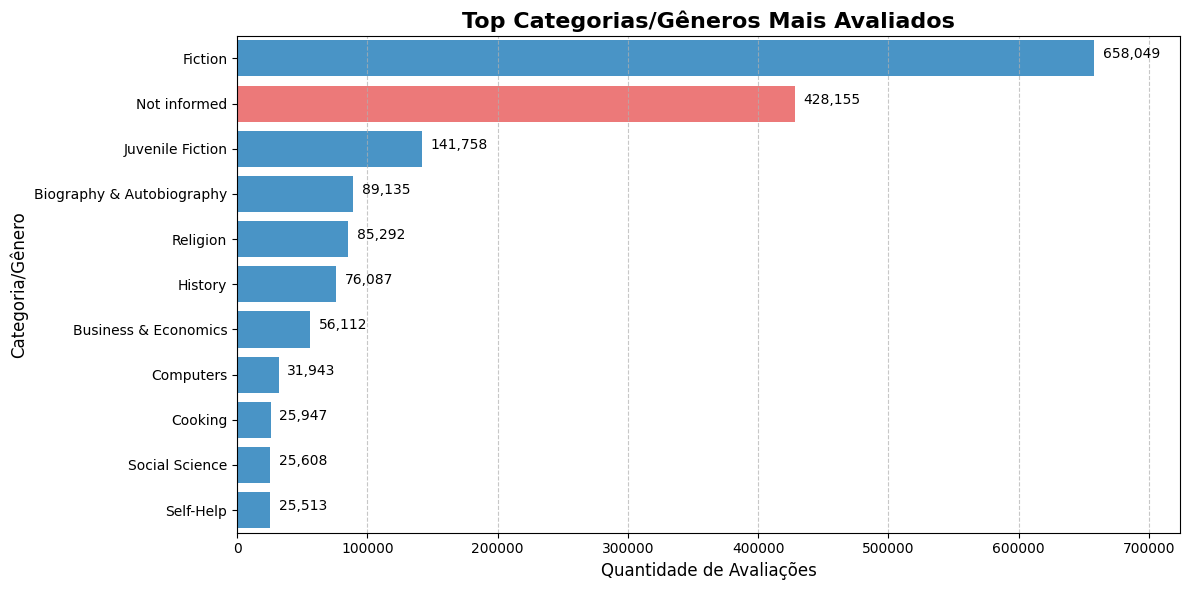

In [19]:
top_categories = (
    df_merged_exploded_cat
    .groupby("categories")["Id"]
    .count()
    .sort_values(ascending=False)
    .head(11)  # Peguei 11 para garantir que 'Not informed' possa aparecer
)

clean_categories = [limpar_lista(cat) for cat in top_categories.index]

colors = ['#FF6666' if "Not informed" in cat else '#3498db' for cat in top_categories.index]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_categories.values,
    y=clean_categories,
    hue=clean_categories,
    palette=colors,
    legend=False
)

for i, v in enumerate(top_categories.values):
    ax.text(v + 0.01 * max(top_categories.values), i, f"{v:,}", ha="left", fontsize=10)

plt.title("Top Categorias/Gêneros Mais Avaliados", fontsize=16, fontweight="bold")
plt.xlabel("Quantidade de Avaliações", fontsize=12)
plt.ylabel("Categoria/Gênero", fontsize=12)

plt.grid(True, axis="x", linestyle="--", alpha=0.7)
plt.xlim(0, max(top_categories.values) * 1.1)

plt.tight_layout()
plt.show()


##### Top Generos/categoria por Avaliação Média

In [27]:
df_merged_exploded_cat = df_merged.explode("categories")

df_valid_categories = df_merged_exploded_cat[df_merged_exploded_cat["categories"] != "['Not informed']"]

avg_score_categories = (
    df_valid_categories.groupby("categories")["score"]
    .mean()
    .sort_values(ascending=False)
)

counts_by_category = df_valid_categories.groupby("categories")["Id"].count()

categories_with_min_reviews = counts_by_category[counts_by_category > minimo_avaliacoes].index

avg_score_categories_filtered = avg_score_categories.loc[categories_with_min_reviews].head(10).sort_values(ascending=False)
print(avg_score_categories_filtered)

categories
['Adventure stories']            4.558089
['African Americans']            4.515672
["Children's stories"]           4.422368
['Animals']                      4.416344
['American fiction']             4.379524
['American literature']          4.262381
['Africa']                       4.260495
['Adventure and adventurers']    4.248980
['American Dream']               4.163036
['Adultery']                     3.910870
Name: score, dtype: float64


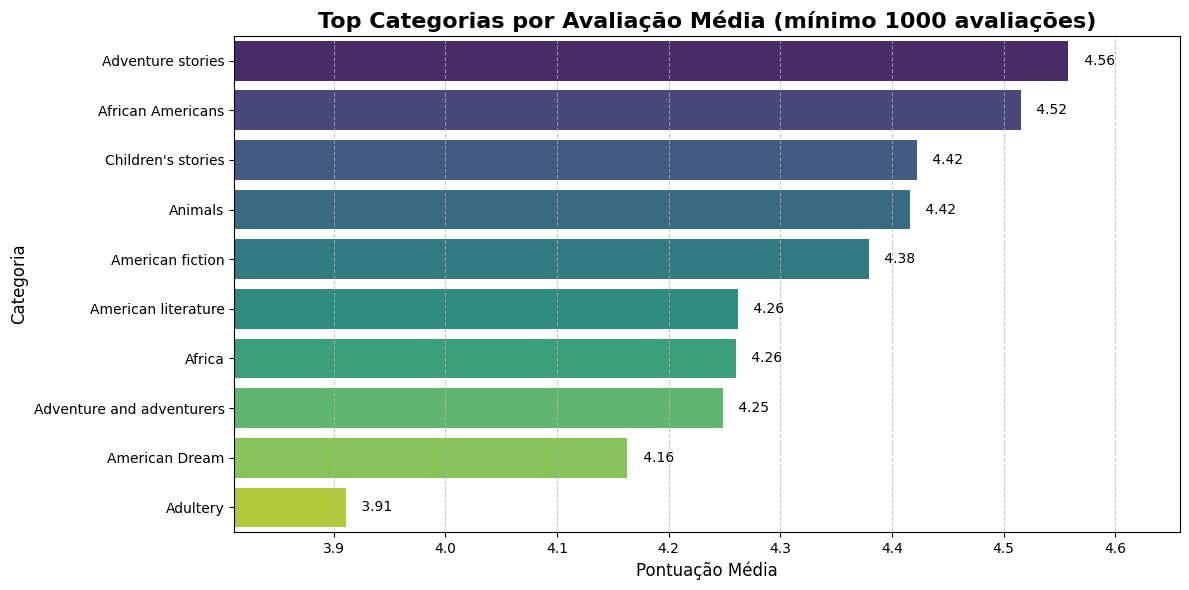

In [21]:
clean_categories = [limpar_lista(cat) for cat in avg_score_categories_filtered.index]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=avg_score_categories_filtered.values,
    y=clean_categories,
    hue=clean_categories,
    palette="viridis",
    legend=False
)

for i, v in enumerate(avg_score_categories_filtered.values):
    ax.text(v + 0.01, i, f" {v:.2f}", va="center", fontsize=10)

plt.title(f"Top Categorias por Avaliação Média (mínimo {minimo_avaliacoes} avaliações)", fontsize=16, fontweight="bold")
plt.xlabel("Pontuação Média", fontsize=12)
plt.ylabel("Categoria", fontsize=12)

plt.grid(True, axis="x", linestyle="--", alpha=0.7)
plt.xlim(min(avg_score_categories_filtered.values) - 0.1, max(avg_score_categories_filtered.values) + 0.1)

plt.tight_layout()
plt.show()

#### Características dos Usuários

##### TOP 10 usuários com mais reviews

In [22]:
user_reviews_count = df_merged.groupby("User_id")["Id"].count().sort_values(ascending=False)
print(user_reviews_count.head(10))

User_id
A14OJS0VWMOSWO    5534
AFVQZQ8PW0L       3561
AHD101501WCN1     1946
A1X8VZWTOG8IS6    1758
A1K1JW1C5CUSUZ    1356
A1S3C5OFU508P3    1235
A1N1YEMTI9DJ86    1015
A2OJW07GQRNJUT     994
A1D2C0WDCSHUWZ     939
A1G37DFO8MQW0M     933
Name: Id, dtype: int64


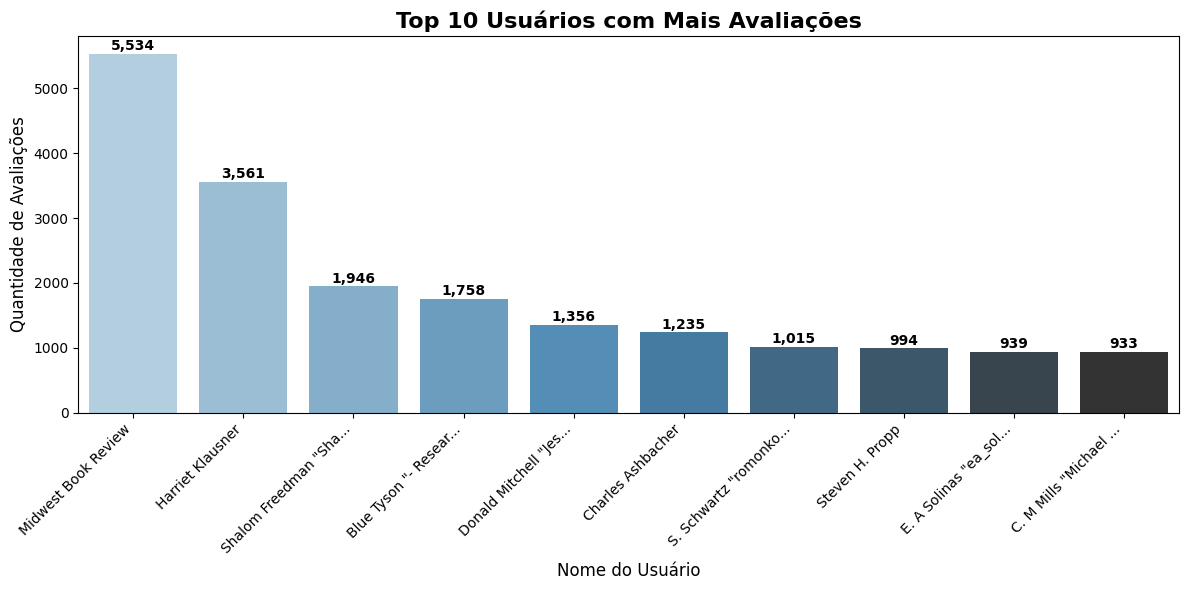

In [23]:
user_reviews_count = df_merged.groupby("User_id")["Id"].count().sort_values(ascending=False)
top_users = user_reviews_count.head(10)

# Criar um dicionário que mapeia User_id para profileName
user_profile_map = df_merged[['User_id', 'profileName']].drop_duplicates(subset=['User_id']).set_index('User_id')['profileName'].to_dict()

# top 10 usuários
profile_names = [user_profile_map.get(user_id, user_id) for user_id in top_users.index]

profile_names = [name[:20] + '...' if len(str(name)) > 20 else name for name in profile_names]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=range(len(top_users)), 
                 y=top_users.values,
                 hue=range(len(top_users)),
                 palette="Blues_d")

plt.xticks(range(len(top_users)), profile_names, rotation=45, ha='right')

plt.title("Top 10 Usuários com Mais Avaliações", fontsize=16, fontweight="bold")
plt.xlabel("Nome do Usuário", fontsize=12)
plt.ylabel("Quantidade de Avaliações", fontsize=12)

for i, v in enumerate(top_users.values):
    ax.text(i, v + max(top_users.values)*0.01, f"{v:,}", ha="center", fontsize=10, fontweight="bold")

plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

##### Usuários 'mais relevantes' (relevance score) - geral

Aqui geramos uma pontuação para os usuários

In [25]:
# Mínimo de reviews para ser considerado relevante
min_reviews_required = 100
peso_reviews = 0.4
peso_text_length = 0.4
peso_std_score = 0.2

user_stats = df_merged.groupby("User_id").agg(
    num_reviews = ("Id", "count"),
    mean_score = ("score", "mean"),
    std_score = ("score", "std")
).reset_index()

# Tamanho médio dos textos que o usuário escreveu
df_merged["text_length"] = df_merged["text_concat"].apply(lambda x: len(str(x)))
text_stats = df_merged.groupby("User_id")["text_length"].mean().reset_index(name="mean_text_length")

user_stats = pd.merge(user_stats, text_stats, on="User_id", how="left")

# Tratar NaNs no std_score (quando só tem 1 review, o desvio padrão é NaN)
user_stats["std_score"] = user_stats["std_score"].fillna(0)

# Aqui, quanto mais reviews, maior pontuação; 
# Quanto maior text_length, maior pontuação;
# Se o std_score estiver entre 0.5 e 1.5, também ganha ponto (indica variação de notas)
user_stats["relevance_score"] = (
    (user_stats["num_reviews"] / user_stats["num_reviews"].max()) * peso_reviews
  + (user_stats["mean_text_length"] / user_stats["mean_text_length"].max()) * peso_text_length 
  + (user_stats["std_score"] / user_stats["std_score"].max()) * peso_std_score  
)


user_stats = user_stats[user_stats["num_reviews"] >= min_reviews_required]

user_stats = user_stats.sort_values("relevance_score", ascending=False)
user_profile_map = df_merged[['User_id', 'profileName']].drop_duplicates(subset=['User_id']).set_index('User_id')['profileName'].to_dict()
user_stats['profileName'] = user_stats['User_id'].map(user_profile_map)

cols = ['User_id', 'profileName', 'num_reviews', 'mean_score', 'std_score', 'mean_text_length', 'relevance_score']
user_stats = user_stats[cols]

# Top 10 usuários com maior "relevance_score"
user_stats.head(10)


,User_id,profileName,num_reviews,mean_score,std_score,mean_text_length,relevance_score
35078,A14OJS0VWMOSWO,Midwest Book Review,5534,4.999096,0.030048,748.617275,0.411305
859732,AFVQZQ8PW0L,Harriet Klausner,3561,4.670598,0.482448,1492.991856,0.309813
870765,AHD101501WCN1,"Shalom Freedman ""Shalom Freedman""",1946,4.697328,0.685031,1312.950668,0.205197
148607,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",1356,4.478614,0.801465,2948.561209,0.190841
246658,A1X8VZWTOG8IS6,"Blue Tyson ""- Research Finished""",1758,3.601820,0.785930,580.324232,0.189759
731565,A3QVAKVRAH657N,"Orrin C. Judd ""brothersjudddotcom""",786,3.861323,1.333490,2849.765903,0.186049
594746,A38CKJ7C1K71JF,Kiwi,159,2.691824,1.806983,2999.270440,0.176044
96978,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",939,4.335463,1.032174,2707.830671,0.174062
764679,A3VAXB8CDYY5BG,J. E. Barnes,132,3.712121,1.438459,4621.015152,0.167920
965949,AU7ND6NOCX9IA,Jill Malter,285,3.989474,1.647628,2441.536842,0.167044


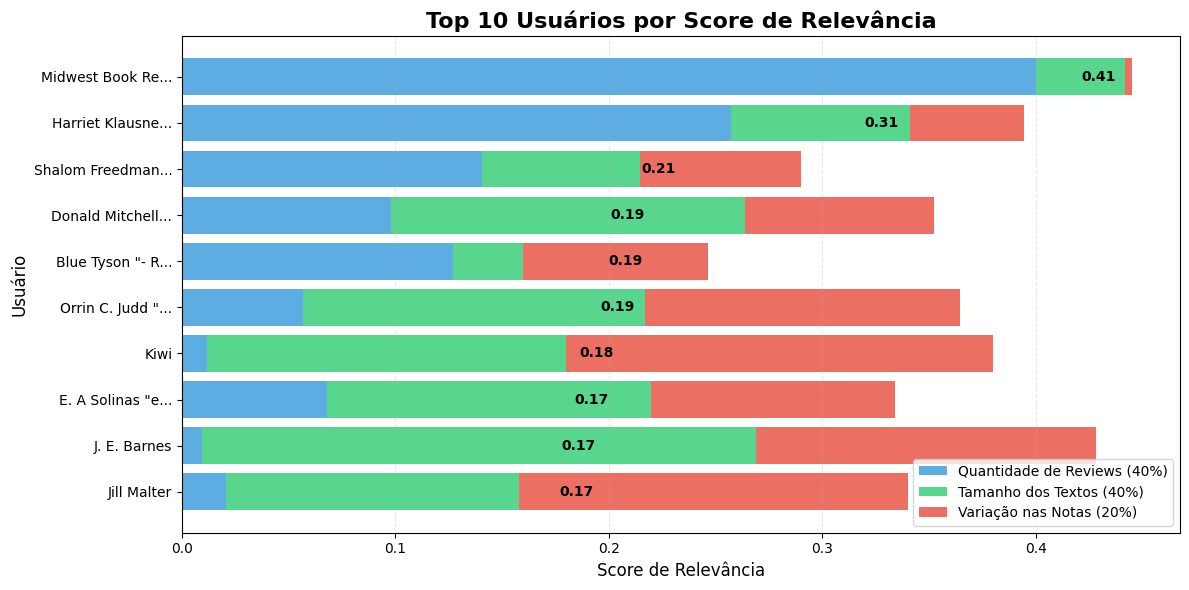

In [28]:
# Selecionar top 10 usuários
top_users = user_stats.head(10).copy()

# Calcular os componentes do score
top_users['num_reviews_component'] = (top_users["num_reviews"] / user_stats["num_reviews"].max()) * peso_reviews
top_users['text_length_component'] = (top_users["mean_text_length"] / user_stats["mean_text_length"].max()) * peso_text_length
top_users['std_score_component'] = (top_users["std_score"] / user_stats["std_score"].max()) * peso_std_score

# Nome de exibição mais curto
top_users['display_name'] = top_users['profileName'].apply(lambda x: str(x)[:15] + '...' if len(str(x)) > 15 else str(x))

plt.figure(figsize=(12, 6))

bars1 = plt.barh(top_users['display_name'], top_users['num_reviews_component'], color='#3498db', alpha=0.8)
bars2 = plt.barh(top_users['display_name'], top_users['text_length_component'], 
                left=top_users['num_reviews_component'], color='#2ecc71', alpha=0.8)
bars3 = plt.barh(top_users['display_name'], top_users['std_score_component'], 
                left=top_users['num_reviews_component'] + top_users['text_length_component'], 
                color='#e74c3c', alpha=0.8)

for i, score in enumerate(top_users['relevance_score']):
    plt.text(score + 0.01, i, f'{score:.2f}', va='center', fontweight='bold')

plt.xlabel('Score de Relevância', fontsize=12)
plt.ylabel('Usuário', fontsize=12)
plt.title('Top 10 Usuários por Score de Relevância', fontsize=16, fontweight='bold')

plt.legend([bars1, bars2, bars3], 
           ['Quantidade de Reviews (40%)', 'Tamanho dos Textos (40%)', 'Variação nas Notas (20%)'],
           loc='lower right')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Possíveis Especialistas (Usuários) em determinado gênero

Análise feita para encontrar possíveis especialistas para entrevistas

In [30]:
# Encontrar as top 10 categorias mais comentadas
df_valid_categories = df_merged_exploded_cat[df_merged_exploded_cat["categories"] != "['Not informed']"]

# Contar frequência de cada categoria
top_100_categorias = (
    df_valid_categories
    .groupby("categories")["Id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Limpar os nomes das categorias
categorias_limpas = [limpar_lista(cat) for cat in top_100_categorias.index]

print("Top 10 Categorias Mais Comentadas:")
for i, (categoria, contagem) in enumerate(zip(categorias_limpas, top_100_categorias.values), 1):
    print(f"{i}. {categoria}: {contagem:,} avaliações")

Top 10 Categorias Mais Comentadas:
1. Fiction: 658,049 avaliações
2. Juvenile Fiction: 141,758 avaliações
3. Biography & Autobiography: 89,135 avaliações
4. Religion: 85,292 avaliações
5. History: 76,087 avaliações
6. Business & Economics: 56,112 avaliações
7. Computers: 31,943 avaliações
8. Cooking: 25,947 avaliações
9. Social Science: 25,608 avaliações
10. Self-Help: 25,513 avaliações


In [34]:
target_genre = "Fiction"

# Mínimo de reviews para ser considerado relevante
min_reviews_required = 100
peso_reviews = 0.4
peso_text_length = 0.4
peso_std_score = 0.2


df_category = df_merged_exploded_cat[
    df_merged_exploded_cat["categories"].str.contains(target_genre, case=False)
].copy()

df_category["text_length"] = df_category["text_concat"].apply(lambda x: len(str(x)))

category_user_stats = df_category.groupby("User_id").agg(
    num_reviews=("Id", "count"),
    mean_score=("score", "mean"),
    std_score=("score", "std"),
    mean_text_length=("text_length", "mean")
).reset_index()

category_user_stats["std_score"] = category_user_stats["std_score"].fillna(0)

category_user_stats["relevance_score"] = (
    (category_user_stats["num_reviews"] / category_user_stats["num_reviews"].max()) * peso_reviews
  + (category_user_stats["mean_text_length"] / category_user_stats["mean_text_length"].max()) * peso_text_length
  + (category_user_stats["std_score"] / category_user_stats["std_score"].max()) * peso_std_score
)


# Aqui eu aplico o filtro de reviews mínimas
category_user_stats = category_user_stats[category_user_stats["num_reviews"] >= min_reviews_required]

category_user_stats.sort_values("relevance_score", ascending=False, inplace=True)

user_profile_map = (
    df_merged[['User_id', 'profileName']]
    .drop_duplicates(subset=['User_id'])
    .set_index('User_id')['profileName']
    .to_dict()
)

category_user_stats['profileName'] = category_user_stats['User_id'].map(user_profile_map)

print(f"Top usuários mais ativos/relevantes em {target_genre}:")
category_user_stats.head(10)[
    ["User_id", "profileName", "num_reviews", "mean_score", "std_score", "mean_text_length", "relevance_score"]
]


Top usuários mais ativos/relevantes em Fiction:


,User_id,profileName,num_reviews,mean_score,std_score,mean_text_length,relevance_score
300637,AFVQZQ8PW0L,Harriet Klausner,2432,4.681743,0.479814,1500.141447,0.465635
86239,A1X8VZWTOG8IS6,"Blue Tyson ""- Research Finished""",931,3.580021,0.809080,604.958110,0.223122
271218,A4FX5YCJA630V,"R. M. Fisher ""Raye""",329,4.352584,0.817306,4857.024316,0.214562
34076,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",445,4.240449,1.132318,2812.629213,0.212706
327590,AQCQ5F0OJXMG9,Crystal Starr Light,108,3.638889,1.285856,4794.296296,0.210019
255968,A3QVAKVRAH657N,"Orrin C. Judd ""brothersjudddotcom""",378,3.888889,1.294073,2518.555556,0.206908
98153,A21W6PCDZWG15R,J C E Hitchcock,110,4.109091,0.980034,5545.454545,0.204600
52245,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",509,4.445972,0.825008,2936.009823,0.204110
61871,A1NT7ED5TATUAM,Bill Slocum,221,3.615385,1.148730,3446.846154,0.190429
132245,A2F6N60Z96CAJI,Bookreporter,424,4.554245,0.600930,3382.311321,0.183718


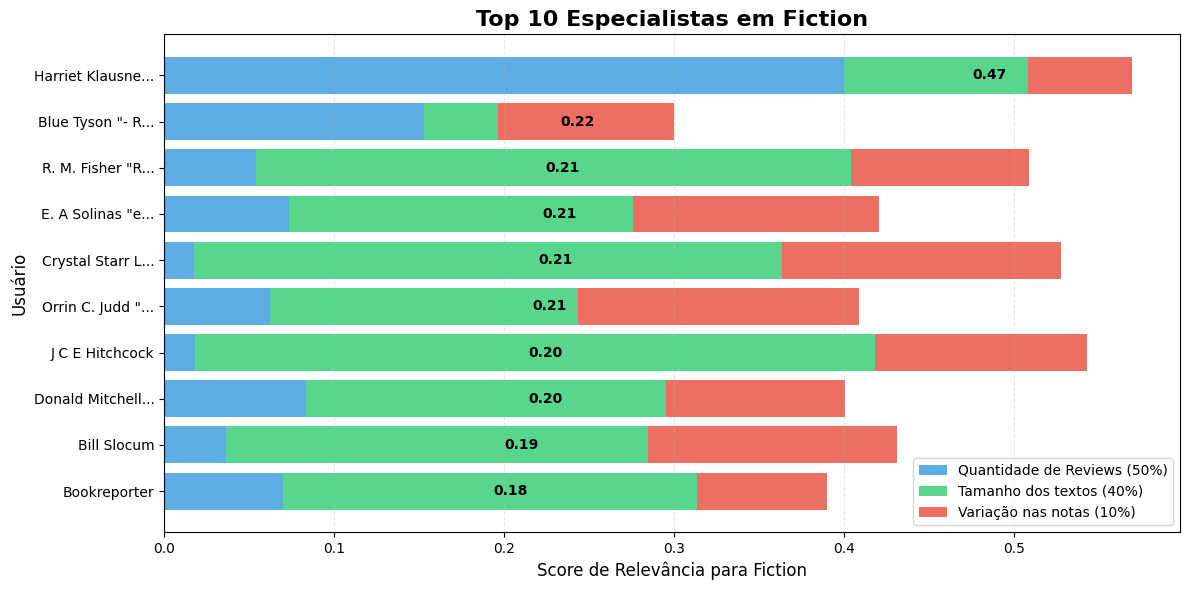

In [35]:
top_users = category_user_stats.head(10).copy()

top_users['comp_num_reviews'] = (top_users["num_reviews"] / category_user_stats["num_reviews"].max()) * peso_reviews
top_users['comp_text_length'] = (top_users["mean_text_length"] / category_user_stats["mean_text_length"].max()) * peso_text_length
top_users['comp_std_score'] = (top_users["std_score"] / category_user_stats["std_score"].max()) * peso_std_score

top_users['nome_exibicao'] = top_users['profileName'].apply(lambda x: str(x)[:15] + '...' if len(str(x)) > 15 else str(x))

plt.figure(figsize=(12, 6))

barras1 = plt.barh(top_users['nome_exibicao'], top_users['comp_num_reviews'], color='#3498db', alpha=0.8)
barras2 = plt.barh(top_users['nome_exibicao'], top_users['comp_text_length'], 
                 left=top_users['comp_num_reviews'], color='#2ecc71', alpha=0.8)
barras3 = plt.barh(top_users['nome_exibicao'], top_users['comp_std_score'], 
                 left=top_users['comp_num_reviews'] + top_users['comp_text_length'], 
                 color='#e74c3c', alpha=0.8)

for i, score in enumerate(top_users['relevance_score']):
    plt.text(score + 0.01, i, f'{score:.2f}', va='center', fontweight='bold')

plt.xlabel(f'Score de Relevância para {target_genre}', fontsize=12)
plt.ylabel('Usuário', fontsize=12)
plt.title(f'Top 10 Especialistas em {target_genre}', fontsize=16, fontweight='bold')

plt.legend([barras1, barras2, barras3], 
           ['Quantidade de Reviews (50%)', 'Tamanho dos textos (40%)', 'Variação nas notas (10%)'],
           loc='lower right')

plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()